In [19]:
#loading and cleaning the dataset

import pandas as pd

df=pd.read_csv('EV_Vehicle_Analysis.csv')

df=df.fillna(0)
df = df[df['State Name'] != 'Grand Total']


print("Columns:", df.columns.tolist())
print("Sample Data:")
print(df.head())

Columns: ['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other', 'Grand Total']
Sample Data:
                   State Name  Two Wheeler  Three Wheeler  Four Wheeler  \
0  Andaman and Nicobar Island            1           30.0            81   
1           Arunachal Pradesh           14            0.0             5   
2                       Assam          721        47041.0           161   
3                       Bihar         5003        59079.0           114   
4                  Chandigarh          298         1410.0           182   

   Goods Vehicles  Public Service Vehicle  Special Category Vehicles  \
0             0.0                    40.0                        0.0   
1             0.0                     0.0                        0.0   
2             7.0                    15.0                        0.0   
3            11.0       

In [9]:
# National Sales per EV type

national_total = df.drop(columns=["State Name", "Grand Total"]).sum().sort_values(ascending=False)

print("Total EV sales by Vehicle Type:")
print(national_total)

Total EV sales by Vehicle Type:
Three Wheeler                     1294372.0
Two Wheeler                        565084.0
Four Wheeler                        52670.0
Other                                8824.0
Goods Vehicles                       6072.0
Public Service Vehicle               4078.0
Special Category Vehicles             820.0
Construction Equipment Vehicle        794.0
Ambulance/Hearses                      12.0
dtype: float64


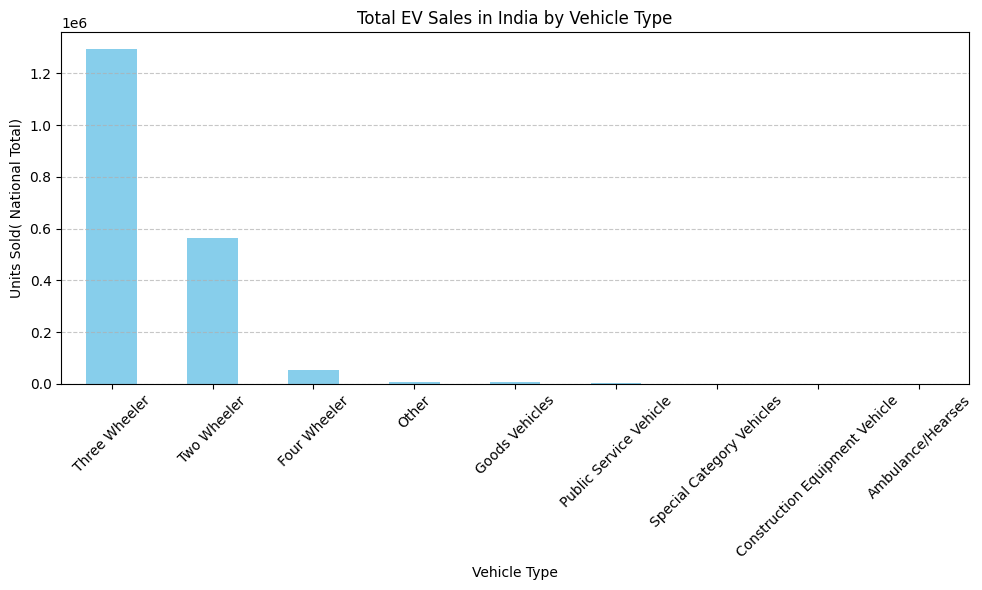

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
national_total.plot(kind='bar', color='skyblue')
plt.title('Total EV Sales in India by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Units Sold( National Total)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

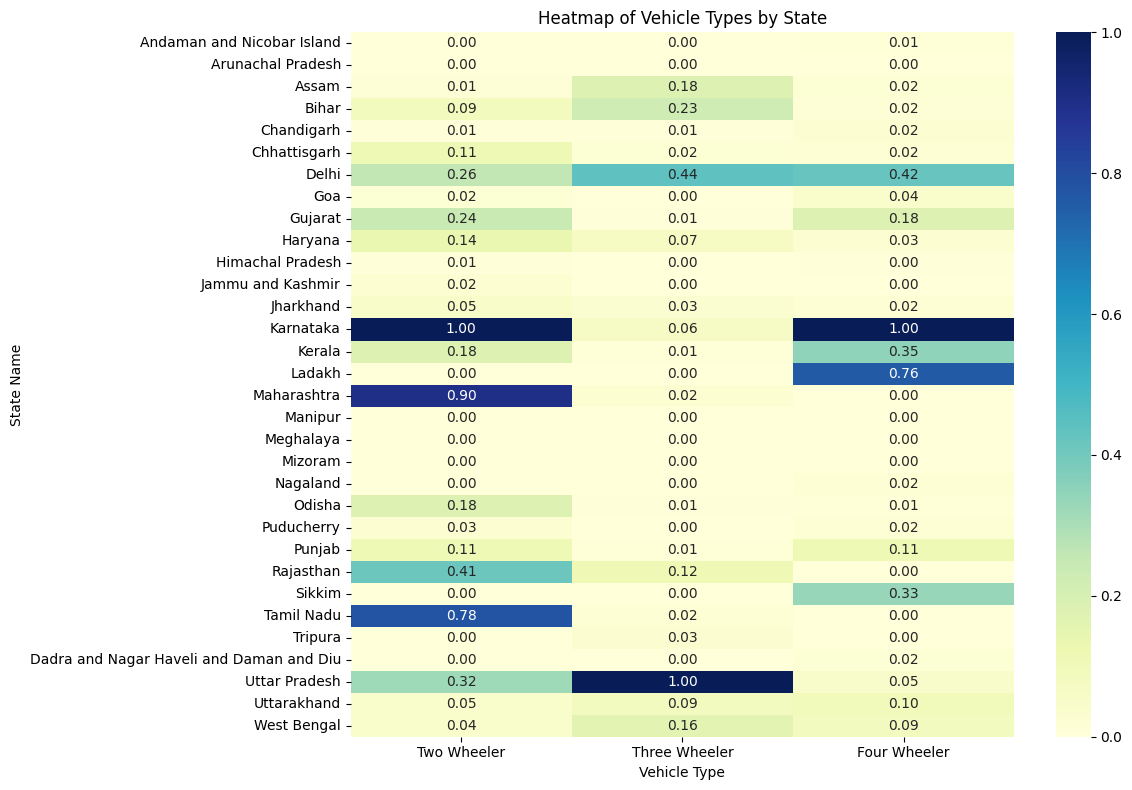

In [37]:
import seaborn as sns
vehicle_data=df.set_index('State Name')[['Two Wheeler', 'Three Wheeler', 'Four Wheeler']]

normalized_vehicle_data = (vehicle_data - vehicle_data.min()) / (vehicle_data.max() - vehicle_data.min())

plt.figure(figsize=(12,8))
sns.heatmap(normalized_vehicle_data, annot=True, fmt='.2f', cmap='YlGnBu')

plt.title("Heatmap of Vehicle Types by State")
plt.xlabel("Vehicle Type")
plt.ylabel("State Name")
plt.tight_layout()
plt.show()

In [24]:
# Conclusion: 
# 3W and 2W EVs are most sold , 4W is far behind - requires high investment , slower adoption
# Focus on 2W or 3W

       State Name  Two Wheeler
13      Karnataka        56737
16    Maharashtra        51149
26     Tamil Nadu        44302
24      Rajasthan        23446
29  Uttar Pradesh        18295


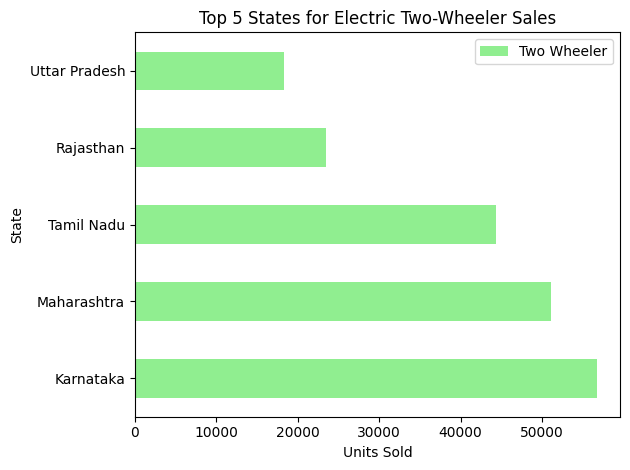

In [33]:
# Top 5 states for each vehicle type

top_2w = df[['State Name','Two Wheeler']].sort_values(by='Two Wheeler', ascending=False).head(5)
print(top_2w)

top_2w.plot(kind='barh', x='State Name', y='Two Wheeler', color='lightgreen')
plt.title('Top 5 States for Electric Two-Wheeler Sales')
plt.xlabel('Units Sold')
plt.ylabel('State')
plt.tight_layout()
plt.show()


In [ ]:
top_3w = df[['State Name', 'Three Wheeler']].sort_values(by='Three Wheeler', ascending=False).head(5)
print(top_3w)

top_3w.plot(kind='barh', x='State Name', y='Three Wheeler', color='skyblue')
plt.title('Top 5 States for Electric Three-Wheeler Sales')
plt.xlabel('Units Sold')
plt.ylabel('State')
plt.tight_layout()
plt.show()


In [22]:
top_4w = df[['State Name', 'Four Wheeler']].sort_values(by='Four Wheeler',ascending=False).head(5)
print(top_4w)

   State Name  Four Wheeler
13  Karnataka          7212
15     Ladakh          5484
6       Delhi          3051
14     Kerala          2524
25     Sikkim          2414


In [23]:
top_states_total=df[['State Name', 'Grand Total']].sort_values(by='Grand Total', ascending=False).head(10)
print("Top States by Overall EV Adoption:")
print(top_states_total)

Top States by Overall EV Adoption:
       State Name  Grand Total
29  Uttar Pradesh       276217
6           Delhi       132302
13      Karnataka        82046
3           Bihar        64241
16    Maharashtra        58815
24      Rajasthan        53141
26     Tamil Nadu        50296
2           Assam        47947
31    West Bengal        44291
9         Haryana        26780


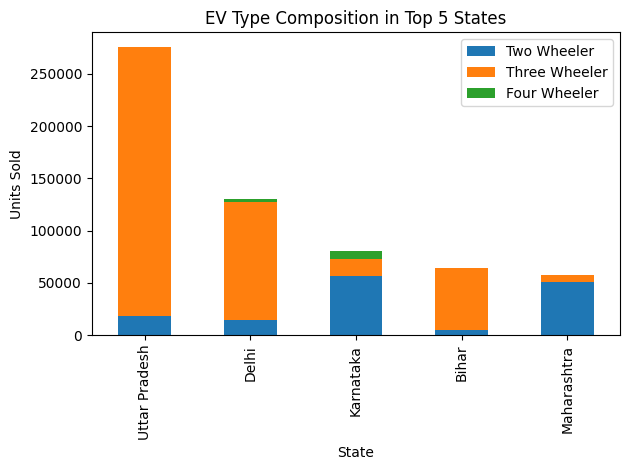

In [32]:
top_states = df.sort_values(by='Grand Total', ascending=False).head(5)
top_states.set_index('State Name')[['Two Wheeler', 'Three Wheeler', 'Four Wheeler']].plot(kind='bar', stacked=True)
plt.title('EV Type Composition in Top 5 States')
plt.xlabel('State')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

In [28]:
# best pick to launch based on the startup vision

# For affordable production , high volume sales, fast entry and infrastructure dependency
# 2W Wins since it is easier to build and popular in Tier-1 cities (Business to Customer)

In [ ]:
# 2W EVs = good for metro cities(Karnataka, Maharashtra, Delhi), Personal Use 
# 3W EVs = great for shared/delivery, rural/urban mass use (UP, Bihar, Assam, West Bengal)

In [ ]:
# Launch 2W EVs in Bengaluru(Karnataka), Pune(Maharashtra) 